In [1]:
import os
import json

def get_data(folder_name):
    x = []
    y = []
    positions = []
    file_names = []

    for file in os.listdir(folder_name):
        if file.endswith(".txt"):
            file_name = os.path.join(folder_name, file[:-4])

            file_text = open(file_name + '.txt', encoding='utf8')
            try:
                file_truth = open(file_name + '.truth', encoding='utf8')

                try:
                    text = file_text.read()
                    truth = json.load(file_truth)
                    truth_changes = len(truth['borders']) > 0
                    truth_positions = truth['borders']

                    x.append(text)
                    y.append(truth_changes)
                    positions.append(truth_positions)
                    file_names.append(file[:-4])
                finally:
                    file_truth.close()
            finally:
                file_text.close()

    return x, y, positions, file_names

In [2]:
BREACH_DIR = '../data/breach'

X, y, positions, file_names = get_data(BREACH_DIR)

In [3]:
import pandas as pd
df = pd.DataFrame(data={'text': X, 'label': y, 'filename': file_names, 'pos':positions})

In [11]:
from nltk.tokenize import sent_tokenize, word_tokenize
df['num_words'] = [len(word_tokenize(x)) for x in df.text]

In [12]:
df.num_words.describe()

count     187.000000
mean     1823.427807
std      1066.696427
min       161.000000
25%      1070.500000
50%      1715.000000
75%      2447.000000
max      5724.000000
Name: num_words, dtype: float64

In [10]:
df.label.tolist().count(True)/df.label.tolist().count(False)

4.194444444444445

In [9]:
df.label.tolist().count(False)/len(df.label.tolist())

0.1925133689839572

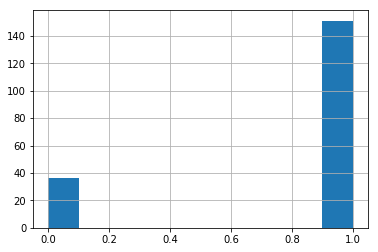

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
df.label.hist()

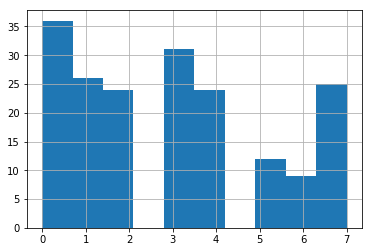

In [5]:
df['num_splits'] = [len(x) for x in df.pos]
df.num_splits.hist()

In [6]:
df.num_splits.describe()

count    187.000000
mean       2.951872
std        2.323983
min        0.000000
25%        1.000000
50%        3.000000
75%        4.000000
max        7.000000
Name: num_splits, dtype: float64

In [7]:
df['num_char'] = [len(x) for x in df.text]
df.num_char.describe()

count      187.000000
mean      9902.614973
std       5961.197490
min        832.000000
25%       5533.000000
50%       8880.000000
75%      13319.500000
max      31848.000000
Name: num_char, dtype: float64

In [12]:
from nltk.tokenize import sent_tokenize
def get_sentences(text, wordFilter=None):
    sentences = []
    paragraphs = [p for p in text.split('\n') if p]
    for paragraph in paragraphs:
        if wordFilter:
            sentences.extend([wordFilter(s) for s in sent_tokenize(paragraph)])
        else:
            sentences.extend(sent_tokenize(paragraph))

    return sentences

In [13]:
s = get_sentences(df.text[0])

In [14]:
for sent in s:
    print(sent)
    print('---------------')

Selecting Vines When selecting vines, there are a number of factors to consider, including their intended use, location in the landscape (ie., sun vs. shade), soil adaptability, type of support needed and color of bloom or foliage characteristics.
---------------
In addition, you also need to consider the maintenance requirement.
---------------
Will the vine need constant pruning to keep it within bounds?
---------------
Certain fast-growing vines, such as wisteria and common honeysuckle, require a great deal of routine pruning.
---------------
If allowed to spread without restraint, their profuse growth can cover trees and shrubs, reducing light and aeration within the canopy.
---------------
Kudzu is an excellent example of this.
---------------
Some vines can even injure or kill small trees by wrapping around them and cutting off nutrient flow.
---------------
Other vines, like Autumn Flowering Clematis, will disperse its seeds after flowering and may pop up in areas where they are